## Imports

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

---
## Loading and exploring the dataset



__1. Load the dataset named carsales.csv and store it in a dataframe called `raw_df`.__

In [2]:
# Insert your code below
# ======================

raw_df = pd.read_csv("carsales.csv") # Since the file was quite tidy, I didn't add a sep=

__2. Print the `five` first rows of the dataframe__

In [3]:
# Insert your code below
# ======================

print(f"\nThe five first rows of the dataframe are:\n {raw_df.head(5)}") # Using head() to get the first five instantly.


The five first rows of the dataframe are:
    Unnamed: 0 Brand       Model  Year                         Fuel  \
0           0   BMW  1 Series M  2011  premium unleaded (required)   
1           1   BMW    1 Series  2011  premium unleaded (required)   
2           2   BMW    1 Series  2011  premium unleaded (required)   
3           3   BMW    1 Series  2011  premium unleaded (required)   
4           4   BMW    1 Series  2011  premium unleaded (required)   

   Horse Power  Engine Cylinders  Number of Doors  \
0        335.0               6.0              2.0   
1        300.0               6.0              2.0   
2        300.0               6.0              2.0   
3        230.0               6.0              2.0   
4        230.0               6.0              2.0   

                       Market Categories Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2  

3. __Which columns in `raw_df` contains missing values?__

In [27]:
# Insert your code below
# ======================

print(f"The columns which contain missing values are: \n{raw_df.isna().sum()}")


The columns which contain missing values are: 
Unnamed: 0                   0
Brand                        0
Model                        0
Year                         0
Fuel                         3
Horse Power                 69
Engine Cylinders            27
Number of Doors              6
Market Categories         2731
Vehicle Size                 0
Vehicle Style                0
Miles Per Gallon (MPG)       0
Retail Price                 0
dtype: int64


__4. Create a copy of `raw_df` named `df`. Remove any rows containing NaN values in the new dataframe. What is the shape of `df` before and after removing the NaN values? How many rows got removed?__

Use `df` in all following tasks unless otherwise is stated

In [5]:
# Insert your code below
# ======================

print(f"The shape before we drop all NaN : {raw_df.shape}\n") # Shape before

df = raw_df.dropna() # Using dropna() to remove all NaN

print(f"\nThe shape after we drop all NaN: {df.shape}\n") # Shape after


The shape before we drop all NaN : (10257, 13)


The shape after we drop all NaN: (7441, 13)



__5. How many unique values exist in each of the columns `Brand` and `Fuel`__

In [6]:
# Insert your code below
# ======================

print(f"There are {df.Brand.nunique()} unique brand values, while there are only {df.Fuel.nunique()} unique fuel values.")

There are 47 unique brand values, while there are only 8 unique fuel values.


__6. Which car brand has the most cars in the dataset?__

In [7]:
# Insert your code below
# ======================

Brand = df.Brand # Defining Brand so I could easily use it later by only calling "Brand".

print(f"The car brand with the most cars in the dataset is: {Brand.value_counts().index[0]}") # Counting each value in Brand before calling the top one.


The car brand with the most cars in the dataset is: Chevrolet


__7. Find the average Retail Price per vehicle style.__

The output should be in the following format:
```python
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
Vehicle Style: [style], Average Price: [msrp]
...
```

In [8]:
# Insert your code below
# ======================

grouped_cars = df.groupby("Vehicle Style")["Retail Price"].mean() # Vehicles and the retail prices. The mean functions calculates the mean.

print(f"\nBelow are the different vehicle styles and their respective mean prices:\n")

for car, mean_price in grouped_cars.items():
    print(f"Vechile Style: [{car}], Average Price: [{mean_price}]") # Printing out each vehicle style and the mean price side by side.



Below are the different vehicle styles and their respective mean prices:

Vechile Style: [2dr Hatchback], Average Price: [22904.551136363636]
Vechile Style: [2dr SUV], Average Price: [42031.11111111111]
Vechile Style: [4dr Hatchback], Average Price: [23684.59713375796]
Vechile Style: [4dr SUV], Average Price: [42588.92898272553]
Vechile Style: [Cargo Minivan], Average Price: [22964.0]
Vechile Style: [Cargo Van], Average Price: [30724.70588235294]
Vechile Style: [Convertible], Average Price: [102362.01605136436]
Vechile Style: [Convertible SUV], Average Price: [47975.0]
Vechile Style: [Coupe], Average Price: [106314.17291414752]
Vechile Style: [Crew Cab Pickup], Average Price: [39032.566860465115]
Vechile Style: [Extended Cab Pickup], Average Price: [32238.53846153846]
Vechile Style: [Passenger Minivan], Average Price: [29838.157894736843]
Vechile Style: [Passenger Van], Average Price: [35963.15]
Vechile Style: [Regular Cab Pickup], Average Price: [28136.792899408283]
Vechile Style: [S

__8. Filter out non-gasoline cars.__

Remove rows where `Fuel == electric` or `Fuel == diesel` and print out the shape of the new dataframe. Save the results to `df_gasoline`

In [9]:
# Insert your code below
# ======================

no_diesel = df[df.Fuel != "diesel"] # Making a new dataframe called no_diesel where we have removed the diesel cars
df_gasoline = no_diesel[df.Fuel != "electric"] # New dataframe called df_gasoline where there are only gasoline cars present
print(f"Below are all the cars which are not electric nor diesel cars:\n {df_gasoline}")

Below are all the cars which are not electric nor diesel cars:
        Unnamed: 0    Brand       Model  Year                            Fuel  \
0               0      BMW  1 Series M  2011     premium unleaded (required)   
1               1      BMW    1 Series  2011     premium unleaded (required)   
2               2      BMW    1 Series  2011     premium unleaded (required)   
3               3      BMW    1 Series  2011     premium unleaded (required)   
4               4      BMW    1 Series  2011     premium unleaded (required)   
...           ...      ...         ...   ...                             ...   
10252       11909    Acura         ZDX  2012     premium unleaded (required)   
10253       11910    Acura         ZDX  2012     premium unleaded (required)   
10254       11911    Acura         ZDX  2012     premium unleaded (required)   
10255       11912    Acura         ZDX  2013  premium unleaded (recommended)   
10256       11913  Lincoln      Zephyr  2006            

C:\Users\Arterx\AppData\Local\Temp/ipykernel_4344/4068372095.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gasoline = no_diesel[df.Fuel != "electric"] # New dataframe called df_gasoline where there are only gasoline cars present


__9. Convert miles per galon to liters per 10 km.__

Add a new column to `gasoline_df` with the fuel consumption measured in liters fuel used per 10km driven. Save the results in a new column named `liters_per_10km`.

Below is a function for converting miles per gallon to litres per 10km. Use this function to convert the values.

In [10]:
def mpg_to_liters_per_10km(mpg):
    """Returns miles per gallon converted to liters per 10km

    Args:
        mpg (int): Fuel efficiency measured in miles per gallon

    Returns:
        float: Fuel efficency measured in liters fuel used per 10 km driven
    """
    return 23.5 / mpg

In [11]:
# Insert your code below
# ======================

df_gasoline["liters_per_10km"] = mpg_to_liters_per_10km(df["Miles Per Gallon (MPG)"])
print(df_gasoline)

       Unnamed: 0    Brand       Model  Year                            Fuel  \
0               0      BMW  1 Series M  2011     premium unleaded (required)   
1               1      BMW    1 Series  2011     premium unleaded (required)   
2               2      BMW    1 Series  2011     premium unleaded (required)   
3               3      BMW    1 Series  2011     premium unleaded (required)   
4               4      BMW    1 Series  2011     premium unleaded (required)   
...           ...      ...         ...   ...                             ...   
10252       11909    Acura         ZDX  2012     premium unleaded (required)   
10253       11910    Acura         ZDX  2012     premium unleaded (required)   
10254       11911    Acura         ZDX  2012     premium unleaded (required)   
10255       11912    Acura         ZDX  2013  premium unleaded (recommended)   
10256       11913  Lincoln      Zephyr  2006                regular unleaded   

       Horse Power  Engine Cylinders  N

C:\Users\Arterx\AppData\Local\Temp/ipykernel_4344/659817667.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gasoline["liters_per_10km"] = mpg_to_liters_per_10km(df["Miles Per Gallon (MPG)"])


__10. Find the cars with the highest and lowest fuel consumption in `df_gasoline`. Print out the brand, model and consumption on the following format:__

```Python
 Lowest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]
Highest fuel consumption: [brand] [model], liters per 10km: [liters_per_10km]

```

In [12]:
# Insert your code below
# ======================

sorted_df = df_gasoline[["Brand", "Model", "liters_per_10km"]].sort_values("liters_per_10km", ascending=True) # Sorting by ascending order of liters_per_10km

print(f"\nLowest fuel consumption: {sorted_df['Brand'].iloc[0]} {sorted_df['Model'].iloc[0]} , liters per 10km: {sorted_df['liters_per_10km'].iloc[0]}\n")
print(f"\nHighest fuel consumption: {sorted_df['Brand'].iloc[-2]} {sorted_df['Model'].iloc[-2]} , liters per 10km: {sorted_df['liters_per_10km'].iloc[-2]}\n")



Lowest fuel consumption: Toyota Prius , liters per 10km: 0.4051724137931034


Highest fuel consumption: Lamborghini Murcielago , liters per 10km: 2.9375



__11. Find all cars in the luxury category and print out the number of cars.__

The different cateogories that the cars belong to is stored in the `Market Categories` column. Use this to find all cars in the `Luxury` category. Save the results to `luxury_df`. Use `df` in this task

In [13]:
# Insert your code below
# ======================

luxury_df = df[df["Market Categories"] == "Luxury"] # Making a new dataframe with only luxury cars
print(f"There are {len(luxury_df.value_counts())} luxury cars.") # Prints the amount of luxury cars


There are 622 luxury cars.


---
# Visualizing



__12. Create a plot with 2 vertical axes and one horizontal axis. The top plot should display a barchard containing the `count` of the `10 most frequent` car brands. The second plot should show the `count` of the most frequent fuel types. Both plots should show data in descending order. Use `df` in this task.__


Hint: It is recommended to use the `Barplot` function built into Seaborn for barcharts.

The output should look something like this:

<img src="assets/barplot_ca1.png"
     alt="Barchart example"
     style="width: 500px; margin-left: 0" />

PS: Disregard the color scheme of the example image.

[Text(0, 0, 'regular unleaded'),
 Text(1, 0, 'premium unleaded (required)'),
 Text(2, 0, 'premium unleaded (recommended)'),
 Text(3, 0, 'flex-fuel (unleaded/E85)'),
 Text(4, 0, 'diesel'),
 Text(5, 0, 'flex-fuel (premium unleaded required/E85)'),
 Text(6, 0, 'flex-fuel (premium unleaded recommended/E85)'),
 Text(7, 0, 'electric')]

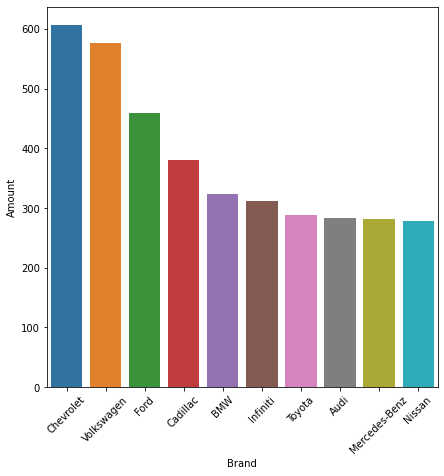

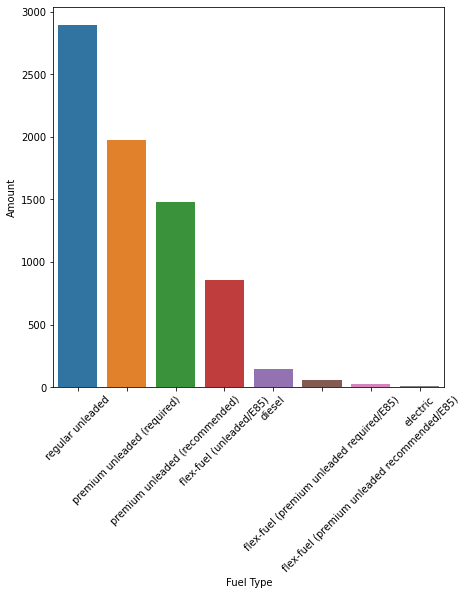

In [20]:
# Insert your code below
# ======================

data_plot_1 = df.Brand.value_counts()[:10] # Getting the values for car brands

brand_dict = {"Amount": list(data_plot_1.values), "Brand": list(data_plot_1.index)} # Making a dictionary for these said values

df_plot_1 = pd.DataFrame(brand_dict) # Making a new dataframe from the dictionary

plt.figure(figsize=(7, 7)) # Setting the figure size 

ax1 = sns.barplot(x="Brand", y="Amount", data=df_plot_1) # Plotting

ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 45) # Rotating the labels so they don't stand inside each other


data_plot_2 = df.Fuel.value_counts()[:10]

fuel_dict = {"Amount": list(data_plot_2.values), "Fuel Type": list(data_plot_2.index)}

df_plot_2 = pd.DataFrame(fuel_dict)

plt.figure(figsize=(7, 7))

ax2 = sns.barplot(x="Fuel Type", y="Amount", data=df_plot_2)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation= 45)





__13. Create a heatmap showing the correlation between the following columns in `df`:__
* Horse Power
* Engine Cylinders
* Miles Per Gallon (MPG)
* Retail Price
* Number of Doors
* Year

The output should look something like this:

<img src="assets/heatmap_ca1.png"
     alt="Heatmap example"
     style="width: 400; margin-left: 0" />


<AxesSubplot:>

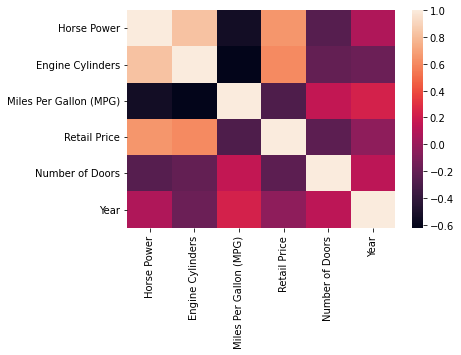

In [24]:
# Insert your code below
# ======================

correlation_df = df[['Horse Power', 'Engine Cylinders', 'Miles Per Gallon (MPG)', 'Retail Price', 'Number of Doors','Year']]
data = correlation_df.corr()
sns.heatmap(data)

__14. Create a scatterplot with `Horse Power` on the x-axis and `liters_per_10km` on the y-axis. The color of the dots should correspond to the vehcle style. Use `df_gasoline` in this task.__

The output should look something like this:

<img src="assets/scatterplot_ca1.png"
     alt="Heatmap example"
     style="width: 200; height:200; margin-left: 0" />

<AxesSubplot:xlabel='Horse Power', ylabel='liters_per_10km'>

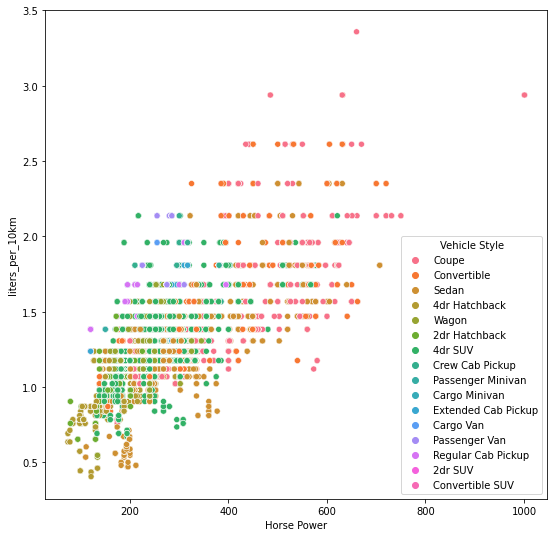

In [23]:
# Insert your code below
# ======================

plt.figure(figsize=(9, 9))

sns.scatterplot(x=df_gasoline["Horse Power"], y=df_gasoline.liters_per_10km, data=df, hue="Vehicle Style")